### Import Dataset

In [5]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [1]:
# Set your directory
my_dir = os.path.dirname(r"C:\Users\USER\OneDrive\Document\VSCode\Statistics")  # Change to your directory
os.chdir(my_dir)

NameError: name 'os' is not defined

In [ ]:
import kagglehub

# Download and read the dataset
path = kagglehub.dataset_download("ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training", output_dir = './data')
df = pd.read_csv('./data/dirty_cafe_sales.csv')

# Rough description of the dataset
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [ ]:
# Sample data before cleaning
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


## DATA CLEANING

## Structure Fixing

In [ ]:
# Standardize ERROR and UNKNOWN to NaN
df_clean = df.replace(['UNKNOWN', 'ERROR'], np.nan)
total_nan = df_clean.isna().sum().sum()
print("Total NaN count: ", total_nan)

# Check for duplicated Transaction
dup_transaction = df_clean['Transaction ID'].duplicated().sum()
print("Duplicated Transaction Count: ", dup_transaction)

Total NaN count:  10082
Duplicated Transaction Count:  0


In [ ]:
# Forced Convert to Numerical Value
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

## EDA #1

### Missingness Analysis

In [ ]:
# Relative output path
out_path = './EDA#1'

Histogram

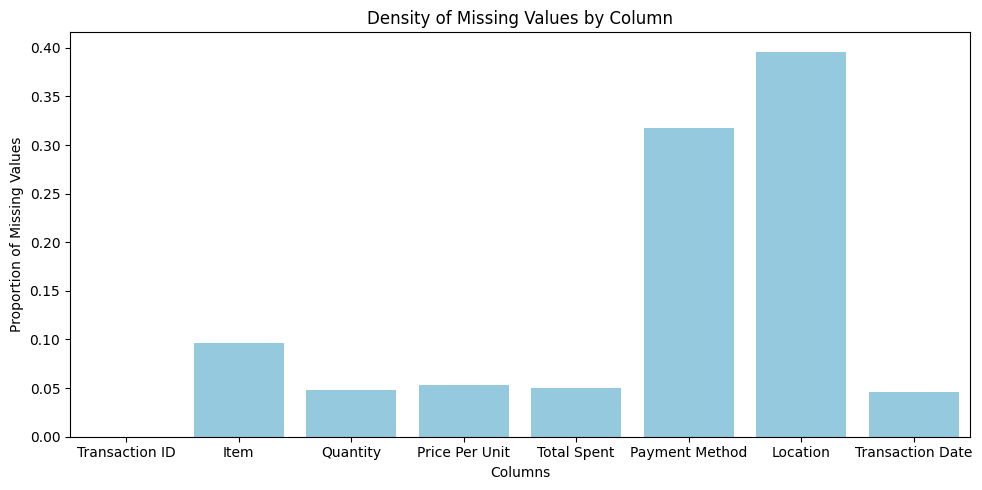

In [ ]:
# Missing value statistic
na_count = df_clean.isna().sum()
na_percent = na_count / len(df_clean)
df_na = pd.DataFrame({'Density': na_percent})

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=df_na.index, y='Density', data=df_na, color='skyblue')
plt.title('Density of Missing Values by Column')
plt.ylabel('Proportion of Missing Values')
plt.xlabel('Columns')
plt.tight_layout()
plt.savefig(os.path.join(out_path, 'missing_value_hist.png'))
plt.show()


Heatmap

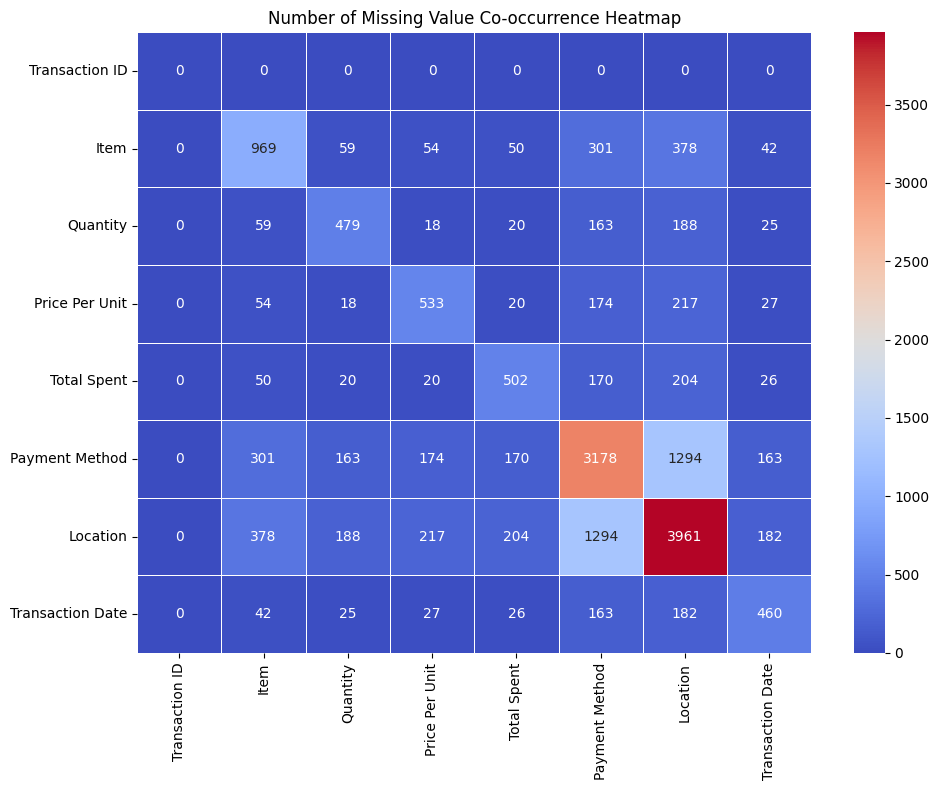

In [ ]:
na_matrix = df_clean.isna()  # Boolean matrix where True = NaN
co_occ_na = na_matrix.T.dot(na_matrix.astype(int))  # Calculate co-occurrence missing matrix
co_occ_na = co_occ_na.astype(int)

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(co_occ_na, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Number of Missing Value Co-occurrence Heatmap')
plt.tight_layout()
plt.savefig(os.path.join(out_path, 'missing_value_cooccurrence.png'))
plt.show()

### Numerical Analysis

Descriptive Statistics

In [ ]:
# Descriptive stats
df_clean.describe()

,Quantity,Price Per Unit,Total Spent
count,9521.000000,9467.000000,9498.000000
mean,3.028463,2.949984,8.924352
std,1.419007,1.278450,6.009919
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


Distribution Histograms

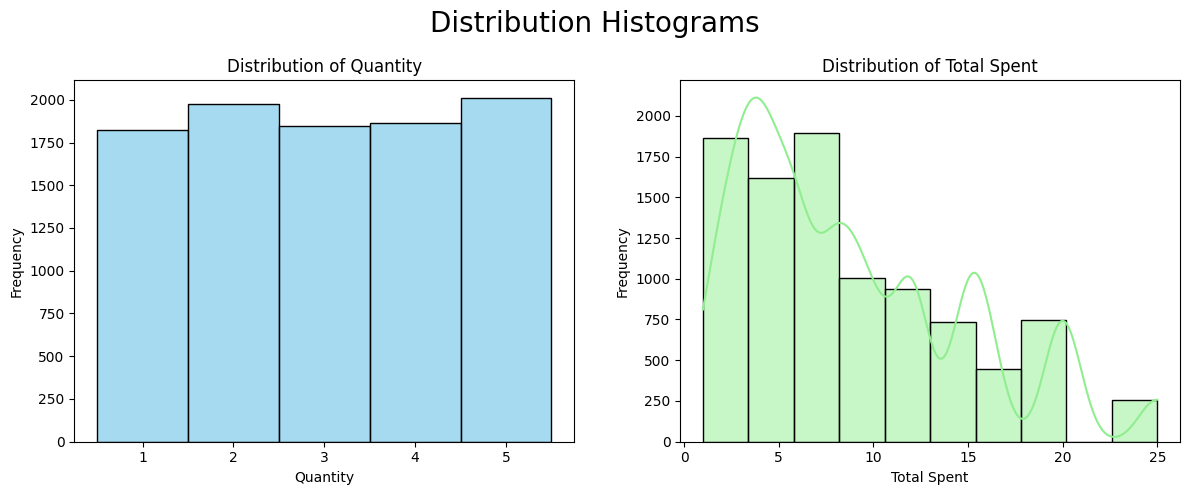

In [ ]:
plt.figure(figsize=(12, 5))

# Distribution of Quantity
plt.subplot(1, 2, 1)
sns.histplot(df_clean['Quantity'], binwidth=1, binrange=(0.5, 5.5), color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Distribution of Total Spent
plt.subplot(1, 2, 2)
sns.histplot(df_clean['Total Spent'], bins=10, kde=True, color='lightgreen')
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')

# Histogram Plotting
plt.suptitle('Distribution Histograms', fontsize = 20)
plt.tight_layout(w_pad=3)
plt.savefig(os.path.join(out_path, 'distribution_hist.png'))
plt.show()

Box Plots

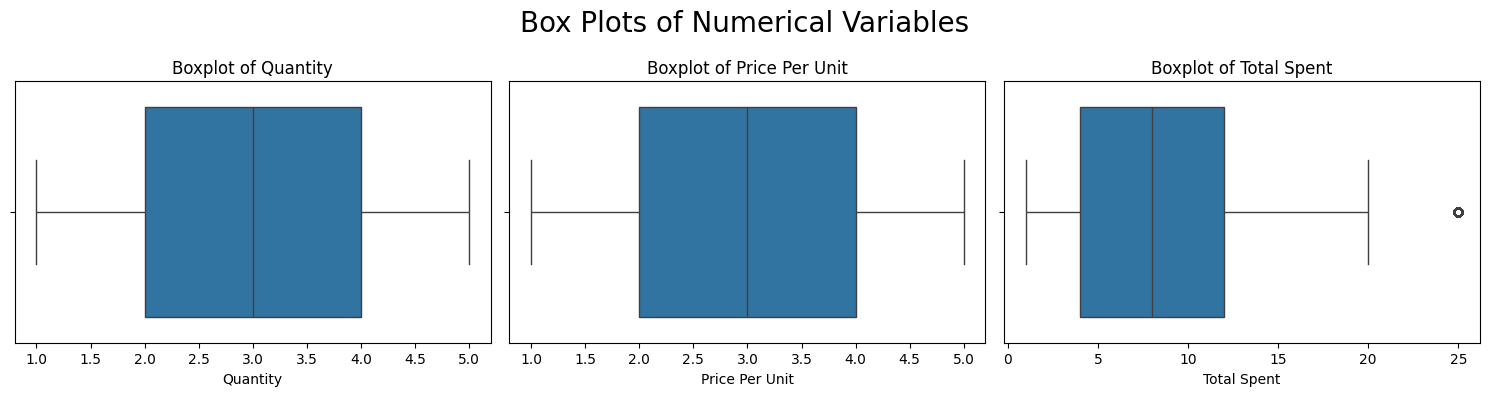

In [ ]:
plt.figure(figsize=(15, 4))

# Box plot of Quantity
plt.subplot(1, 3, 1)
sns.boxplot(x=df_clean['Quantity'])
plt.title('Boxplot of Quantity')

# Box plot of Price Per Unit
plt.subplot(1, 3, 2)
sns.boxplot(x=df_clean['Price Per Unit'])
plt.title('Boxplot of Price Per Unit')


# Box plot of Total Spent
plt.subplot(1, 3, 3)
sns.boxplot(x=df_clean['Total Spent'])
plt.title('Boxplot of Total Spent')

# Box Plotting
plt.suptitle('Box Plots of Numerical Variables', fontsize = 20)
plt.tight_layout(w_pad=1)
plt.savefig(os.path.join(out_path, 'blox_plots.png'))
plt.show()

### Categorical Analysis

In [ ]:
# Item color palette
item_colors = {
    "Cake": "#E91E63",
    "Coffee": "#6F4E37",
    "Cookie": "#D2B48C",
    "Juice": "#FF5722",
    "Salad": "#4CAF50",
    "Sandwich": "#FFC107",
    "Smoothie": "#9C27B0",
    "Tea": "#009688"
}

Item Frequency

In [8]:

plt.figure(figsize=(10, 10))

# Item Frequency in Transactions
item_counts = df_clean['Item'].value_counts(dropna=False).reset_index()
item_counts.columns = ['Item', 'Count']
item_counts['Item'] = item_counts['Item'].fillna('NaN')

plt.subplot(2, 1, 1)
ax = sns.barplot(x='Item', y='Count', data=item_counts, hue='Item', palette=item_colors)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Item Frequency in Transactions')
plt.ylabel('Transactions')
plt.xlabel('Item')

# Total Item Frequency
total_items = df_clean.groupby('Item', dropna = False)['Quantity'].sum().reset_index()
total_items['Item'] = total_items['Item'].fillna('NaN')

plt.subplot(2, 1, 2)
ax = sns.barplot(x='Item', y='Quantity', data=total_items, palette='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Total Item Frequency')
plt.ylabel('Quantity')
plt.xlabel('Item')

plt.tight_layout()
plt.savefig(os.path.join(out_path, 'item_count_hist.png'))
plt.show()

NameError: name 'df_clean' is not defined

<Figure size 1000x1000 with 0 Axes>

Total Spent by Item

C:\Users\USER\AppData\Local\Temp\ipykernel_13556\1726930782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Total Spent', y='Item', data=df_clean, palette='Set3')


Text(0.5, 1.0, 'Total Spent by Item')

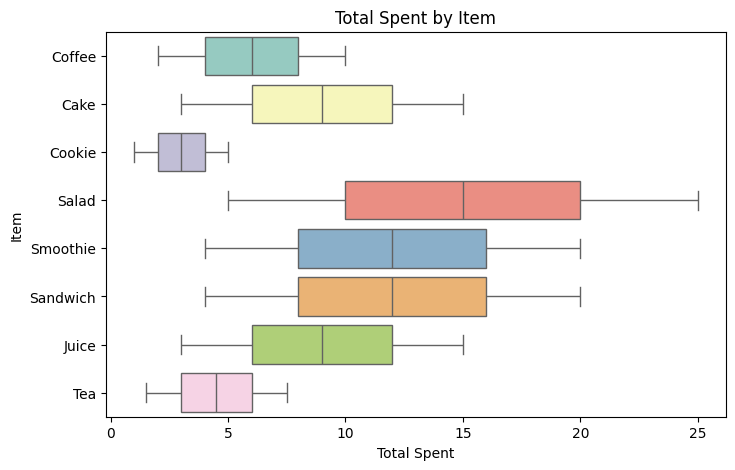

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Total Spent', y='Item', data=df_clean, palette='Set3')
plt.title('Total Spent by Item')

In [ ]:
print(df_clean['Payment Method'].unique())
print(df_clean['Location'].unique())

['Credit Card' 'Cash' nan 'Digital Wallet']
['Takeaway' 'In-store' nan]


C:\Users\USER\AppData\Local\Temp\ipykernel_13556\3126185910.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item', y='Total Spent', data=df_clean, palette='Set3')


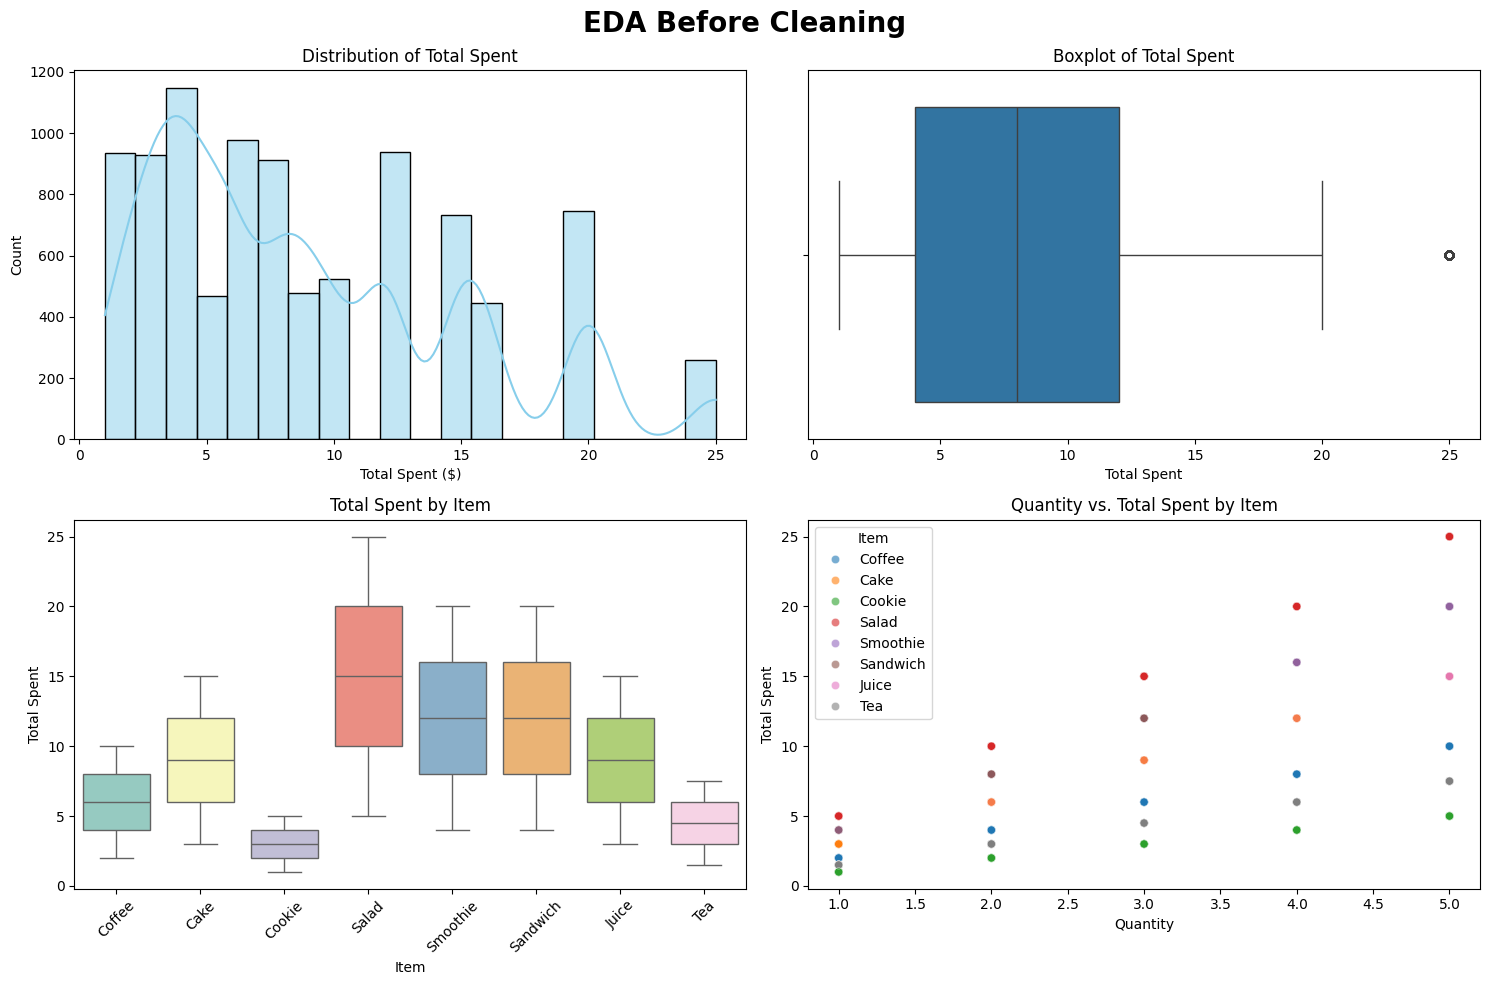

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle('EDA Before Cleaning', fontsize = 20, fontweight = 'bold')

# Distribution of Total Spent
plt.subplot(2, 2, 1)
sns.histplot(df_clean['Total Spent'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent ($)')

# Boxplot of Total Spent
plt.subplot(2, 2, 2)
sns.boxplot(x=df_clean['Total Spent'])
plt.title('Boxplot of Total Spent')

# Boxplot of Total Spent by Item
plt.subplot(2, 2, 3)
sns.boxplot(x='Item', y='Total Spent', data=df_clean, palette='Set3')
plt.title('Total Spent by Item')
plt.xticks(rotation=45)

# Relationship between Quantity and Total Spent
plt.subplot(2, 2, 4)
sns.scatterplot(x='Quantity', y='Total Spent', hue='Item', data=df_clean, alpha=0.6)
plt.title('Quantity vs. Total Spent by Item')

plt.tight_layout()
plt.savefig('eda_before_cleaning.png')
plt.show()

## Calculate Missing Values

Map missing Price Per Unit and Item

In [ ]:
# Duplicate the dataframe for calculation
df_cal = df_clean.copy()

# Replace NaN Price Per Unit according to Item
item_prices_map = {
    "Cake": 3.0,
    "Coffee": 2.0,
    "Cookie": 1.0,
    "Juice": 3.0,
    "Salad": 5.0,
    "Sandwich": 4.0,
    "Smoothie": 4.0,
    "Tea": 1.5
}
df_cal['Price Per Unit'] = df_cal['Price Per Unit'].fillna(df_cal['Item'].map(item_prices_map))

# Replace NaN Item according to Price Per Unit
reverse_map = {a:b for a, b in item_prices_map.items()}
df_cal['Item'] = df_cal['Item'].fillna(df_cal['Price Per Unit'].map(item_prices_map))

Calculate missing Total Spent

In [ ]:
print("Missing Total Spent BEFORE Cleaning: ", df_cal['Total Spent'].isna().sum())

mask = df_cal['Total Spent'].isna() & df_cal['Price Per Unit'].notna() & df_cal['Quantity'].notna()
# Total Spent = Price Per Unit * Quantity
df_cal.loc[mask, 'Total Spent'] = df_cal.loc[mask, 'Price Per Unit'] * df_cal.loc[mask, 'Quantity']
print("Missing Total Spent AFTER Cleaning: ", df_cal['Total Spent'].isna().sum())

Missing Total Spent BEFORE Cleaning:  502
Missing Total Spent AFTER Cleaning:  23


Calculate missing Quantity

In [ ]:
print("Missing Quantity BEFORE Cleaning: ", df_cal['Quantity'].isna().sum())

mask = df_cal['Quantity'].isna() & df_cal['Total Spent'].notna() & df_cal['Price Per Unit'].notna()
# Quantity = Total Spent / Price Per Unit
df_cal.loc[mask, 'Quantity'] = df_cal.loc[mask, 'Total Spent'] / df_cal.loc[mask, 'Price Per Unit']
print("Missing Quantity AFTER Cleaning: ", df_cal['Quantity'].isna().sum())

Missing Quantity BEFORE Cleaning:  479
Missing Quantity AFTER Cleaning:  23


Calculate missing Price Per Unit

In [ ]:
print("Missing Price Per Unit BEFORE Cleaning: ", df_cal['Price Per Unit'].isna().sum())

mask = df_cal['Price Per Unit'].isna() & df_cal['Total Spent'].notna() & df_cal['Quantity'].notna()
# Price Per Unit = Total Spent / Quantity
df_cal.loc[mask, 'Price Per Unit'] = df_cal.loc[mask, 'Total Spent'] / df_cal.loc[mask, 'Quantity']
print("Missing Price Per Unit AFTER Cleaning: ", df_cal['Price Per Unit'].isna().sum())

Missing Price Per Unit BEFORE Cleaning:  54
Missing Price Per Unit AFTER Cleaning:  6


### EDA

In [ ]:
# Descriptive Stats
df_cal.describe()

# Numerical NaN value rows count
mask = df_cal['Quantity'].isna() | df_cal['Total Spent'].isna() | df_cal['Price Per Unit'].isna()
print("Numerical NaN: ", len(df_cal[mask]), " rows")

Numerical NaN:  26  rows


C:\Users\USER\AppData\Local\Temp\ipykernel_13556\2437535159.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item', y='Total Spent', data=df_cal, palette='Set3')


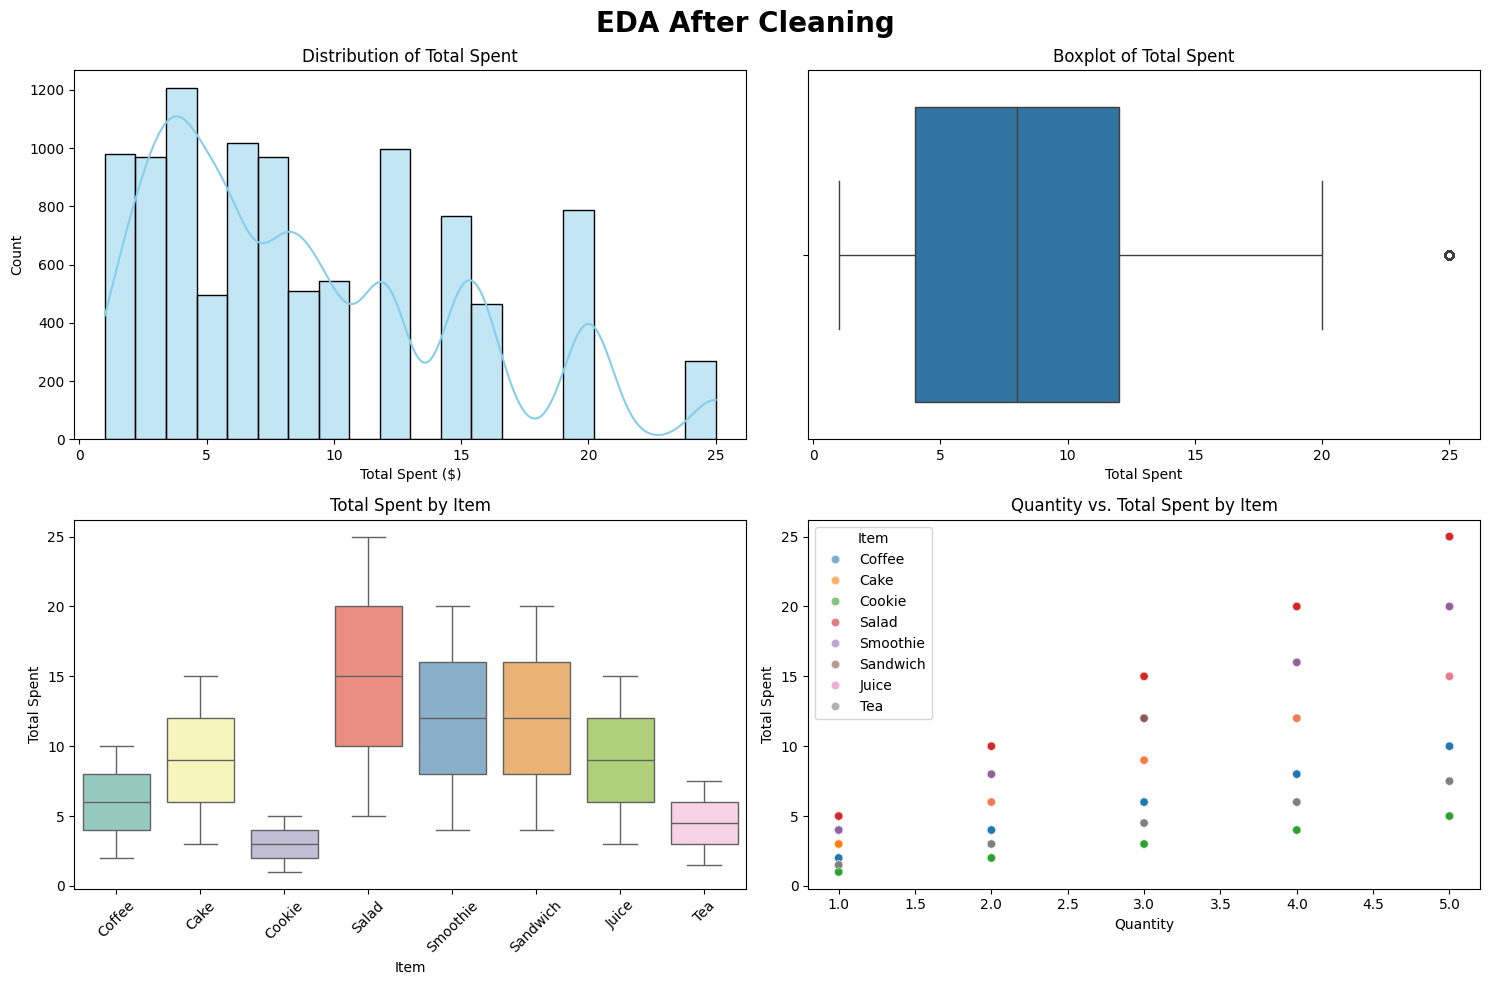

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle('EDA After Cleaning', fontsize = 20, fontweight = 'bold')

# Distribution of Total Spent
plt.subplot(2, 2, 1)
sns.histplot(df_cal['Total Spent'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent ($)')

# Boxplot of Total Spent
plt.subplot(2, 2, 2)
sns.boxplot(x=df_cal['Total Spent'])
plt.title('Boxplot of Total Spent')

# Boxplot of Total Spent by Item
plt.subplot(2, 2, 3)
sns.boxplot(x='Item', y='Total Spent', data=df_cal, palette='Set3')
plt.title('Total Spent by Item')
plt.xticks(rotation=45)

# Relationship between Quantity and Total Spent
plt.subplot(2, 2, 4)
sns.scatterplot(x='Quantity', y='Total Spent', hue='Item', data=df_cal, alpha=0.6)
plt.title('Quantity vs. Total Spent by Item')

plt.tight_layout()
plt.savefig('eda_after_cleaning.png')
plt.show()